## Семинар 3 "Определение ключевых точек лица"

ФИО: Дегтярев Роман Олегович

# Подготовительная задача 1

Сделать из линейной регрессии nn.sequental двухслойную сеть

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Parameters:
_LR = 0.001
_BATCH_SIZE = 32
_EPOCH = 20
_EPS=1.00000e-02
_RAND_STATE = 42

In [ ]:
#Load MNIST
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
#network architecture 
class network_sigmoid(nn.Module):

    def __init__(self):
        super(network_sigmoid, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(784, 100),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(100, _BATCH_SIZE),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(_BATCH_SIZE,10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.fc(out)
        return out

In [ ]:
fnn = network_sigmoid()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fnn.parameters(), lr=_LR)

# Подготовительная задача 2

Используя структуру сети Sequental в pytorch реализовать и обучить классификатор цифр из MNIST
(повторить первый и второй пункты из прошлого задания )

In [ ]:
loss_train = []
for i in range(_EPOCH):
    for j,[image,label] in enumerate(train_loader):
        image = Variable(image)
        label = Variable(label)
        image = image.view(-1, 28*28)
        #print image.size()
        optimizer.zero_grad()
        result = fnn.forward(image)
        loss = loss_func(result,label)
        loss.backward()
        optimizer.step()
        if (loss.data.numpy()[0]<_EPS):
            break
        
        if j % 1000 == 0:
            loss_train.append(loss.data.numpy()[0])
            print(loss)

In [ ]:
#Network with Sigmoid 
plt.plot(np.array(loss_train), label='Train')
plt.ylabel('CrossEntropyLoss')
plt.xlabel('Number of epoch')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
class network_ReLU(nn.Module):

    def __init__(self):
        super(network_ReLU, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(100, _BATCH_SIZE),
            nn.ReLU()
        )
        self.fc = nn.Linear(_BATCH_SIZE,10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.fc(out)
        return out

In [ ]:
snn = network_ReLU()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(snn.parameters(), lr=_LR)

In [ ]:
loss_train = []
for i in range(_EPOCH):
    for j,[image,label] in enumerate(train_loader):
        image = Variable(image)
        label = Variable(label)
        image = image.view(-1, 28*28)
        #print image.size()
        optimizer.zero_grad()
        result = snn.forward(image)
        loss = loss_func(result,label)
        loss.backward()
        optimizer.step()
        if (loss.data.numpy()[0]<_EPS):
            break
        
        if j % 1000 == 0:
            loss_train.append(loss.data.numpy()[0])
            #print(loss)

In [ ]:
#Network with ReLU
plt.plot(np.array(loss_train), label='Train')
plt.ylabel('CrossEntropyLoss')
plt.xlabel('Number of epoch')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#Для ReLU сошлось побыстрее

## Задание

Используя датасет из архива решите задачу регрессии для поиска 68-ми ключевых точек лица. 

Для обучения и валидации используйте изображения и разметку из папок train и test соответственно.

Попробуйте сети глубины 1 и 2 и разные активации (ELU, RELU и sigmoid).

Image name: 109.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[  7.  41.]
 [  8.  51.]
 [ 10.  60.]
 [ 13.  70.]]
(96, 96)


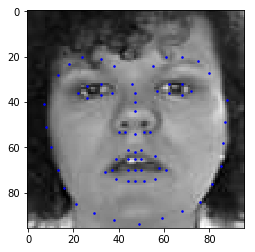

In [3]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 100
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    print(image.shape)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='b')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

In [4]:
# class Rescale(object):
#     """Rescale the image in a sample to a given size.

#     Args:
#         output_size (tuple or tuple): Desired output size. If tuple, output is
#             matched to output_size. If int, smaller of image edges is matched
#             to output_size keeping aspect ratio the same.
#     """

#     def __init__(self, output_size):
#         assert isinstance(output_size, (int, tuple))
#         self.output_size = output_size

#     def __call__(self, sample):
#         image, landmarks = sample['image'], sample['landmarks']

#         h, w = image.shape[:2]
#         if isinstance(self.output_size, int):
#             if h > w:
#                 new_h, new_w = self.output_size * h / w, self.output_size
#             else:
#                 new_h, new_w = self.output_size, self.output_size * w / h
#         else:
#             new_h, new_w = self.output_size

#         new_h, new_w = int(new_h), int(new_w)

#         img = transform.resize(image, (new_h, new_w))

#         # h and w are swapped for landmarks because for images,
#         # x and y axes are axis 1 and 0 respectively
#         landmarks = landmarks * [new_w / w, new_h / h]

#         return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        #image = image.transpose((0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [5]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [6]:
# scale = Rescale(256)
# crop = RandomCrop(128)
# composed = transforms.Compose([Rescale(256),
#                                RandomCrop(224)])

In [7]:
train_landmarks_path = 'dataset/train/face_landmarks.csv'
train_path = 'dataset/train/'
test_landmarks_path = 'dataset/test/face_landmarks.csv'
test_path = 'dataset/test'

In [8]:
transformed_dataset = FaceLandmarksDataset(csv_file=train_landmarks_path,
                                           root_dir= train_path, transform=transforms.Compose([
                                               #RandomCrop(90),
                                               ToTensor()
                                           ])
                                           )

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].float().size(), sample['landmarks'].float().size())
 
    if i == 3:
        plt.show()

        break

0 torch.Size([96, 96]) torch.Size([68, 2])
1 torch.Size([96, 96]) torch.Size([68, 2])
2 torch.Size([96, 96]) torch.Size([68, 2])
3 torch.Size([96, 96]) torch.Size([68, 2])


In [9]:
dataloader = DataLoader(transformed_dataset, batch_size=40,
                        shuffle=True, num_workers=4)

In [12]:
D_in, H, D_out = 96*96, 330, 136

batch_size = 200
num_epoch = 100
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy()


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ELU(),
          #torch.nn.Linear(H, H),
          #torch.nn.Sigmoid(),
          torch.nn.Linear(H, D_out)
        )

#loss_fn = torch.nn.CrossEntropyLoss()
#loss_fn = nn.NLLLoss()
loss_fn = torch.nn.MSELoss(size_average=True)

learning_rate = 1e-4/2.5
flag_train_epoch = []
flag_test = []
flag = []
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)
k = 0
for t in range(num_epoch):
    for T in dataloader:
        k+=1
        X = T['image'].view(T['image'].size(0), -1).float()
        Y = T['landmarks'].view(T['landmarks'].size(0), -1).float()
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)
        
        y_pred = model.forward(x)

        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    for W in dataloader:
        Q_1 = W['image'].view(W['image'].size(0), -1).float()
        Q_2 = W['landmarks'].view(W['landmarks'].size(0), -1).float()
        x_1 = Variable(Q_1, requires_grad = False)
        y_2 = Variable(Q_2, requires_grad = False)

        y_pred_test = model.forward(x_1)
        loss_1 = loss_fn(y_pred_test, y_2)
        flag_test.append(loss_1.data[0])
        
        
    flag_train_epoch.append(np.array(flag).mean())
    print ('epoch %d, meanerror %f' % (t,  np.array(flag).mean()))

epoch 0, meanerror 1207436.635470
epoch 1, meanerror 762337.065031
epoch 2, meanerror 607737.749083
epoch 3, meanerror 526038.910720
epoch 4, meanerror 473708.013132
epoch 5, meanerror 436223.339402
epoch 6, meanerror 407353.475125
epoch 7, meanerror 383975.820194
epoch 8, meanerror 364350.478783
epoch 9, meanerror 347428.189549
epoch 10, meanerror 332537.122291
epoch 11, meanerror 319225.987476
epoch 12, meanerror 307179.314161
epoch 13, meanerror 296169.028027
epoch 14, meanerror 286025.419375
epoch 15, meanerror 276619.268214
epoch 16, meanerror 267849.804375
epoch 17, meanerror 259637.195535
epoch 18, meanerror 251916.728329
epoch 19, meanerror 244635.469434
epoch 20, meanerror 237749.343617
epoch 21, meanerror 231221.264482
epoch 22, meanerror 225019.673750
epoch 23, meanerror 219117.367684
epoch 24, meanerror 213490.716807
epoch 25, meanerror 208119.060743
epoch 26, meanerror 202984.116134
epoch 27, meanerror 198069.787611
epoch 28, meanerror 193361.522078
epoch 29, meanerror 188

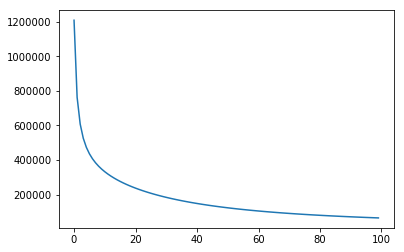

In [14]:
plt.figure()
plt.plot(range(num_epoch), flag_train_epoch)

In [15]:
tr_data_test = FaceLandmarksDataset(csv_file=test_landmarks_path,
                                           root_dir=test_path, transform=transforms.Compose([
                                               #RandomCrop(90),
                                               ToTensor()
                                           ])
                                           )

In [16]:
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv(test_landmarks_path)

#n = 60
#img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)


def plt_test(i):   
    landmarks = landmarks_frame.ix[i, 1:].as_matrix().astype('float')
    landmarks = landmarks.reshape(-1, 2)
    plt.figure()
    a = tr_data_test[i]['image'].float()
    a = a.view(-1)
    f = predict(model, a)
    f_1 = f[::2]
    f_2 = f[1::2]
    img_name = landmarks_frame.ix[i, 0]
    plt.figure()
    plt.imshow(io.imread(os.path.join(test_path, img_name)), cmap='gray')
    plt.scatter(f_1, f_2, s=10, marker='.', c='b')
    #plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')

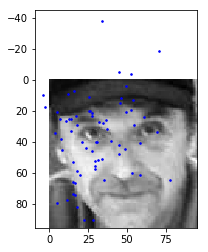

In [18]:
plt_test(5)

In [ ]:
class network_work1(nn.Module):
    def __init__(self):
        super(network_work1, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(96*96, 500),
            nn.BatchNorm1d(500,500),
            nn.ReLU()
        )
        self.fc = nn.Linear(500,136)

    def forward(self, x):
        out = self.layer1(x)
        out = self.fc(out)
        return out

In [ ]:
#X - это картинки, y - это координаты точек, 6221 rows in X

In [ ]:
X = np.array([[io.imread(os.path.join('dataset/train/', im_name ))] for im_name in landmarks_frame.ix[:, 0]])

In [ ]:
X.shape

In [ ]:
X = X.reshape(-1,96,96)

In [ ]:
landmarks_frame.head()

In [ ]:
landmarks_all = np.array([[landmarks_frame.ix[n, 1:].as_matrix().astype('float')] for n in range(0,landmarks_frame.shape[0])])

In [ ]:
y = landmarks_all.reshape(-1,136)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=_RAND_STATE)

In [ ]:
lnn1 = network_work1()

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(lnn1.parameters(), lr=_LR)

In [ ]:
loss_train = []
for i in range(_EPOCH):
    for (image,label) in zip(X_train, y_train):
        image = Variable(torch.from_numpy(image))
        image = image.float()
        image = image.view(-1, 96*96)
        label = Variable(torch.from_numpy(label))
        label = label.float()
        optimizer.zero_grad()
        result = lnn1.forward(image)
        loss = loss_func(result,label)
        loss.backward()
        optimizer.step()
        if (loss.data.numpy()[0]<_EPS):
            break
        
    if i % 4 == 0:
        loss_train.append(loss.data.numpy()[0])
        print(loss)

In [ ]:
plt.plot(np.array(loss_train), label='Train')
plt.ylabel('MSELoss')
plt.xlabel('Number of epoch')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
out = lnn1(Variable(torch.from_numpy(X_train).view(-1, 96*96)).float())

In [ ]:
out.data

In [ ]:
type(out)

In [ ]:
out = out.data.numpy()

In [ ]:
out = np.array([out[:,::2], out[:,1:][:,::2]])#[x,y]

In [ ]:
out.shape

In [ ]:
out = out.reshape(-1,68,2)

In [ ]:
show_landmarks(X_train[0],out[0].reshape(-1, 2))

In [ ]:
#ну такое